In [4]:
# Import necessary packages
import networkx as nx
import pickle
import evaluate as ev
import numpy as np

Specify pickle file location here (of graph object list and properties list)

In [5]:
# Path location for saved data
savelocG=r"sliced_data/connected_cavemen_graphs_first_50.pickle"
savelocP=r"sliced_data/connected_cavemen_properties_first_50.pickle"

# save file for csv (unique to graphs)
#csv_save_loc = savelocG.split('_')[-5]
csv_save_loc =savelocG.split('/')[-1]+"num-cluster"
print(csv_save_loc)

connected_cavemen_graphs_first_50.picklenum-cluster


In [6]:
# Load data from pickle files
with open(savelocG, "rb") as input_file:
    graphs = pickle.load(input_file)

with open(savelocP, "rb") as input_file:
    properties = pickle.load(input_file)
print(f'Loaded Graphs: {len(graphs)}\nLoaded Properties: {len(properties)}')

Loaded Graphs: 50
Loaded Properties: 50


In [7]:
#Slice
# graphs=graphs[:100]
# properties=properties[:100]

In [8]:
for i in properties:
    np.set_printoptions(suppress=True)
    print(i)

[25.         50.          4.          0.16666667]
[ 50.         225.           9.           0.18367347]
[ 75.         525.          14.           0.18918919]
[100.         950.          19.           0.19191919]
[ 125.         1500.           24.            0.19354839]
[ 150.         2175.           29.            0.19463087]
[ 175.        2975.          34.           0.1954023]
[ 200.        3900.          39.           0.1959799]
[ 225.         4950.           44.            0.19642857]
[ 250.         6125.           49.            0.19678715]
[ 275.         7425.           54.            0.19708029]
[ 300.         8850.           59.            0.19732441]
[  325.         10400.            64.             0.19753086]
[  350.         12075.            69.             0.19770774]
[  375.         13875.            74.             0.19786096]
[  400.         15800.            79.             0.19799499]
[  425.         17850.            84.             0.19811321]
[  450.         20025.

[number of nodes, number of edges, avg_degree, density]

In [9]:
def print_properties(arr):
    str = "Properties\n"
    str += f"Nodes = {arr[0]} | "
    str += f"Edges = {arr[1]} | "
    str += f"Average Degree = {arr[2]} | "
    str += f"Density = {arr[3]} | "
    print(str)

def extract_properties(arr):
    return [int(arr[0]), int(arr[1]), arr[2], arr[3]]

Properties
Nodes = 25.0 | Edges = 50.0 | Average Degree = 4.0 | Density = 0.16666666666666666 | 


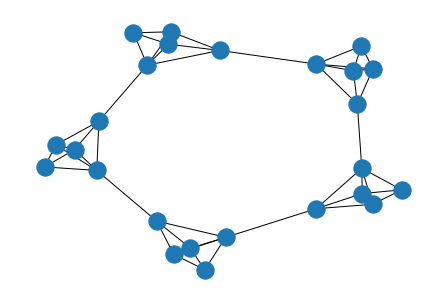

In [10]:
# Sanity check 
for g,p in zip(graphs, properties):
    nx.draw(g)
    print_properties(p)
    break

## HCS Algorithm 
#### Test graphs using HCS algorithm and analyze results

In [11]:
# Install dependency
# !pip install netgraph

In [12]:
from networkx.algorithms import community
from netgraph import Graph
import matplotlib.pyplot as plt
from hcs_module import HCS,labelled_HCS
import csvwriter as cvw

In [13]:
# Helper function to generate node-community dict for netgraph color function
def node_comm_dict(labels):
    out = dict()
    for (node, comm) in enumerate(labels):
        out[node] = comm
    return out


In [14]:
# Choose second graph in the array
G = graphs[2].copy()

In [15]:
# Check the HCS algorithm on a graph
HCS_G = HCS(G.copy())
labels, itr = labelled_HCS(G.copy())
node_to_community= node_comm_dict(labels)

cutratio = ev.cut_ratio(G,itr)
avg_internal_density= ev.avg_internal_density(G,itr)
coverage, performance = ev.cov_per(G,itr)
modularity = ev.modularity(G,itr)

print(extract_properties(properties[2]))
print(cutratio, avg_internal_density, coverage, performance, modularity)


[75, 525, 14.0, 0.1891891891891892]
0.0022222222222222222 0.9904761904761905 0.9904761904761905 0.9963963963963964 0.7904761904761904


### Default function to run all graphs and cluster them

In [17]:
import timeit
from IPython.display import clear_output, display
def evaluate_graphs(graphs):
    csvwriter= cvw.CustomCSV(cols=cvw.CustomCSV.ALL_HEADER)
    results = []
    for idx, graph in enumerate(graphs):
        print(idx)
        G = graph.copy()
        
        # Clustering algorithm start
        start = timeit.default_timer()
        labels, itr = labelled_HCS(G.copy())
        exec_time = timeit.default_timer() - start
        # end
        #print(exec_time)
        cutratio = ev.cut_ratio(G,itr)
        modularity = ev.modularity(G,itr)
        avg_internal_density= ev.avg_internal_density(G,itr)
        coverage, performance = ev.cov_per(G,itr)
        node_to_community= node_comm_dict(labels)
        # Num of clusters
        num_of_clusters = len([*itr])
        props = extract_properties(properties[idx])
        results.append([*props,cutratio, avg_internal_density,coverage, performance, modularity,exec_time,num_of_clusters])
        clear_output(wait=True)
    csvwriter.write_to_csv(data=results,filename=csv_save_loc)

evaluate_graphs(graphs=graphs[:40])

> Sucessfully written to ./csvs/connected_cavemen_graphs_first_50.picklenum-cluster ...


/global/scratch/saffat/miniconda3/envs/sage/lib/python3.10/site-packages/netgraph/_edge_layout.py:534: UserWarning: Edge-bundling of self-loops not supported. Self-loops are removed from the edge list.
  warnings.warn('Edge-bundling of self-loops not supported. Self-loops are removed from the edge list.')
/global/scratch/saffat/miniconda3/envs/sage/lib/python3.10/site-packages/netgraph/_edge_layout.py:761: RuntimeWarning: invalid value encountered in true_divide
  displacement = compatibility * delta / distance_squared[..., None]


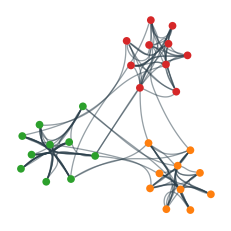

In [15]:
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:pink',
    5 : 'tab:cyan',
    6 : 'tab:olive',
    7 : 'tab:purple',
    8 : 'tab:brown'
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

Graph(G,
      node_color=node_color, node_edge_width=0, edge_alpha=0.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled'
)

plt.show()

In [14]:
# Helper function to draw both original and clustered graphs
def plot_graph_and_cluster(G, node_color_dict, key="HCS"):
    '''
      Input:
      G = The original graph
      node_color_dict = The clustered graph node community dict
      key = The name of the clustering algorithm
      
      Output: 
      void 
    '''
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Original Graph and Clustered Graph using '+ key)
    
    # Draw original graph
    nx.draw(G, ax=ax1)
    
    # Draw clusterd graph
    Graph(G,
      node_color=node_color, node_edge_width=0, edge_alpha=0.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled',
      ax=ax2
    )
    plt.show()

In [15]:
#plot_graph_and_cluster(G, node_color)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load csv file containing info
raw = pd.read_csv(f"./csvs/{csv_save_loc}.csv")
raw.head()

,Number of nodes,Number of Edges,Average Degree,Density,Cut-Ratio,Avg. internal density,Coverage,Performance,Modularity,Execution Time,Num of Clusters
0,25,50,4.0,0.166667,0.020000,0.900000,0.900000,0.966667,0.700000,0.024718,5
1,50,225,9.0,0.183673,0.005000,0.977778,0.977778,0.991837,0.777778,0.048334,5
2,75,525,14.0,0.189189,0.002222,0.990476,0.990476,0.996396,0.790476,0.082549,5
3,100,950,19.0,0.191919,0.001250,0.994737,0.994737,0.997980,0.794737,0.122685,5
4,125,1500,24.0,0.193548,0.000800,0.996667,0.996667,0.998710,0.796667,0.242145,5


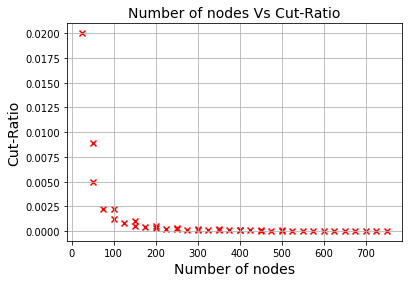

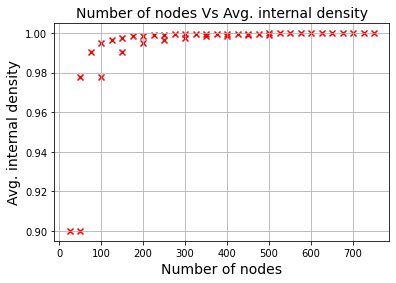

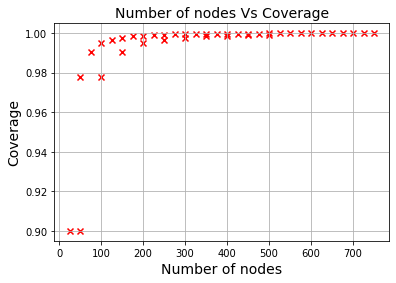

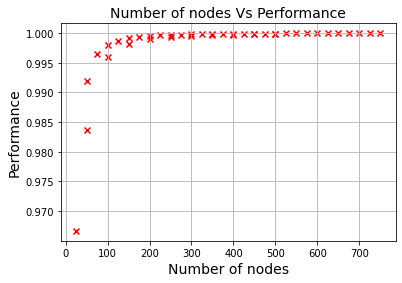

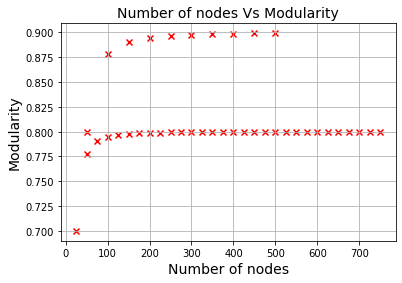

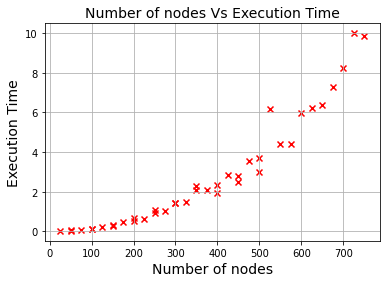

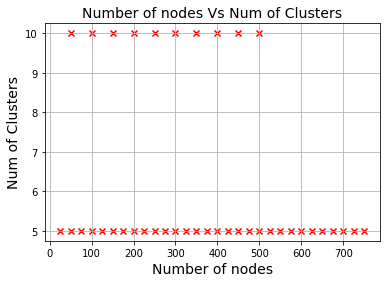

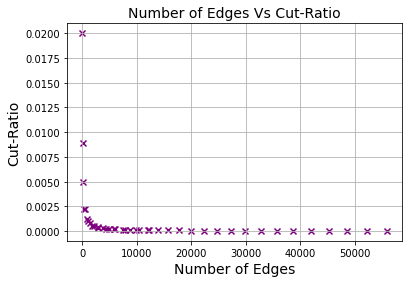

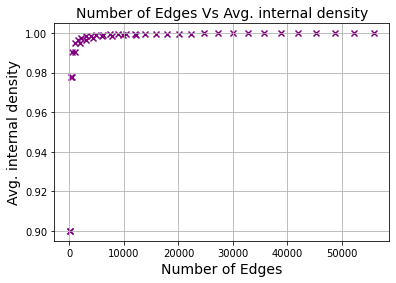

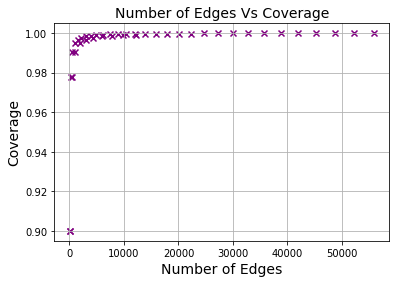

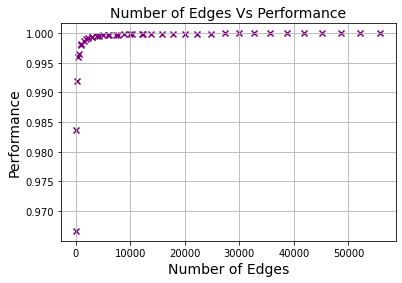

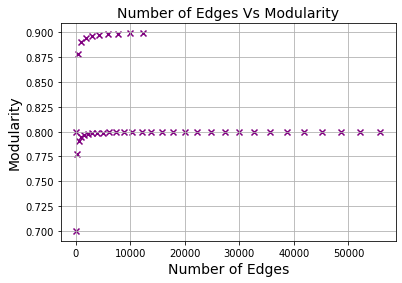

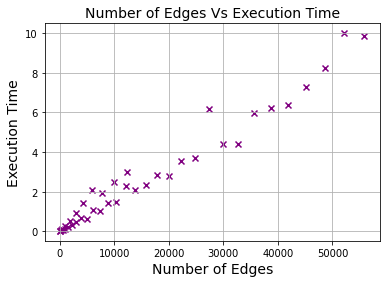

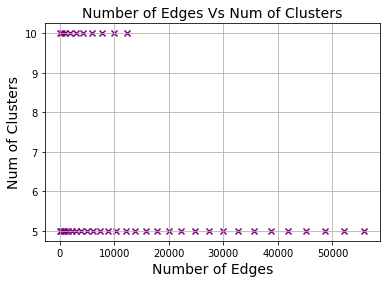

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### Visualization for HCS algorithm
# Load csv file containing info
PERFOMANCE_METRICS = cvw.CustomCSV.PERFOMANCE_METRICS

for idx, metric in enumerate(PERFOMANCE_METRICS):

    # Plot node vs density
    plt.figure()
    plt.scatter(raw["Number of nodes"],raw[metric], color='red', marker='x')
    plt.title(f'Number of nodes Vs {metric}', fontsize=14)
    plt.xlabel('Number of nodes', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.grid(True)
    plt.show()

for idx, metric in enumerate(PERFOMANCE_METRICS):

    # Plot edges vs density
    plt.figure()
    plt.scatter(raw["Number of Edges"],raw[metric], color='purple', marker='x')
    plt.title(f'Number of Edges Vs {metric}', fontsize=14)
    plt.xlabel('Number of Edges', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.grid(True)
    plt.show()